<a href="https://colab.research.google.com/github/ahmer-talal/Neural-Networks/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


### **Loading Fashion Dataset(built-in)**

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


### **Class Labels**

In [8]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


### **Normalize & Reshape**

In [10]:
X_train = X_train / 255.0
X_test  = X_test  / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)


### **Visualize before training**

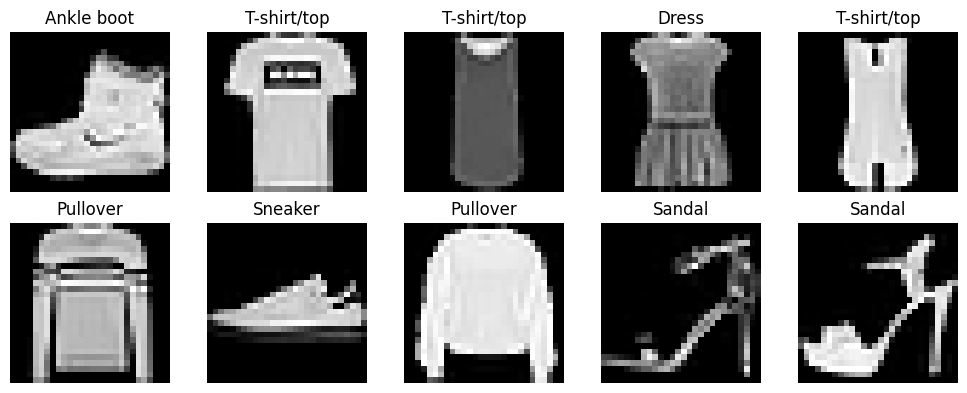

In [11]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### **CNN Model**

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Model Training**

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.7495 - loss: 0.6840 - val_accuracy: 0.8598 - val_loss: 0.3820
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.8768 - loss: 0.3357 - val_accuracy: 0.8864 - val_loss: 0.3177
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.8956 - loss: 0.2827 - val_accuracy: 0.8921 - val_loss: 0.2935
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.9091 - loss: 0.2499 - val_accuracy: 0.9019 - val_loss: 0.2713
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9195 - loss: 0.2165 - val_accuracy: 0.9057 - val_loss: 0.2628
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9267 - loss: 0.1989 - val_accuracy: 0.9108 - val_loss: 0.2544
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9339 - loss: 0.1761 - val_accuracy: 0.9103 - val_loss: 0.2548
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9409 - loss: 0.1572 - 

### **Accuracy & Loss Curves**

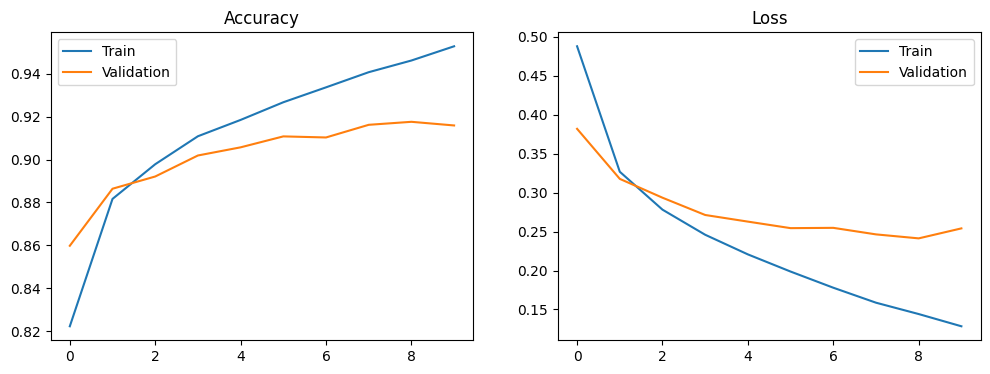

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()

plt.show()


### **Visualize Predictions for Testing**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


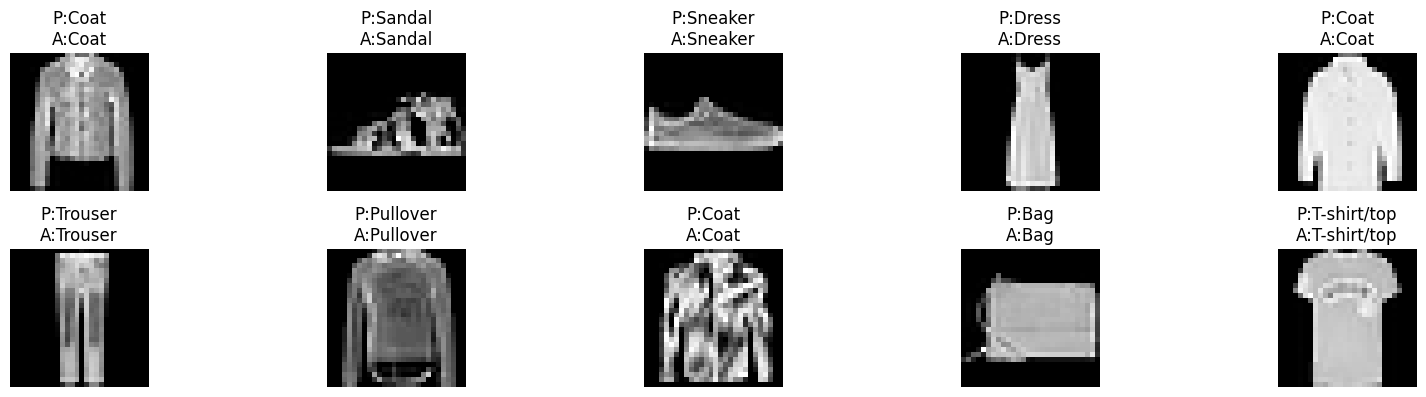

In [15]:
plt.figure(figsize=(16,8))

for i, idx in enumerate(range(10, 20)):
    img = X_test[idx]
    pred = model.predict(img.reshape(1,28,28,1))
    predicted_label = np.argmax(pred)

    plt.subplot(4,5,i+1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title(f"P:{class_names[predicted_label]}\nA:{class_names[y_test[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


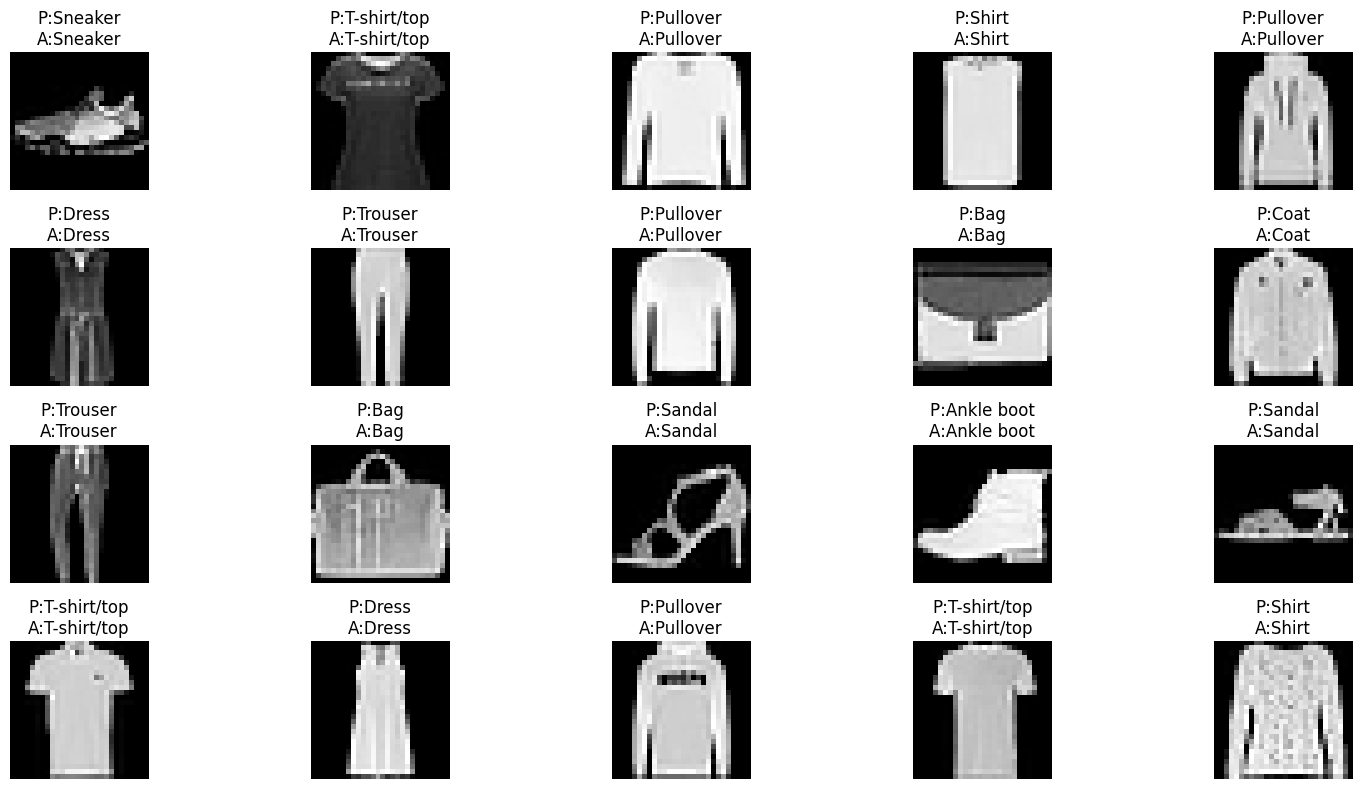

In [17]:
plt.figure(figsize=(16,8))

for i, idx in enumerate(range(70, 90)):
    img = X_test[idx]
    pred = model.predict(img.reshape(1,28,28,1))
    predicted_label = np.argmax(pred)

    plt.subplot(4,5,i+1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title(f"P:{class_names[predicted_label]}\nA:{class_names[y_test[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### **Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


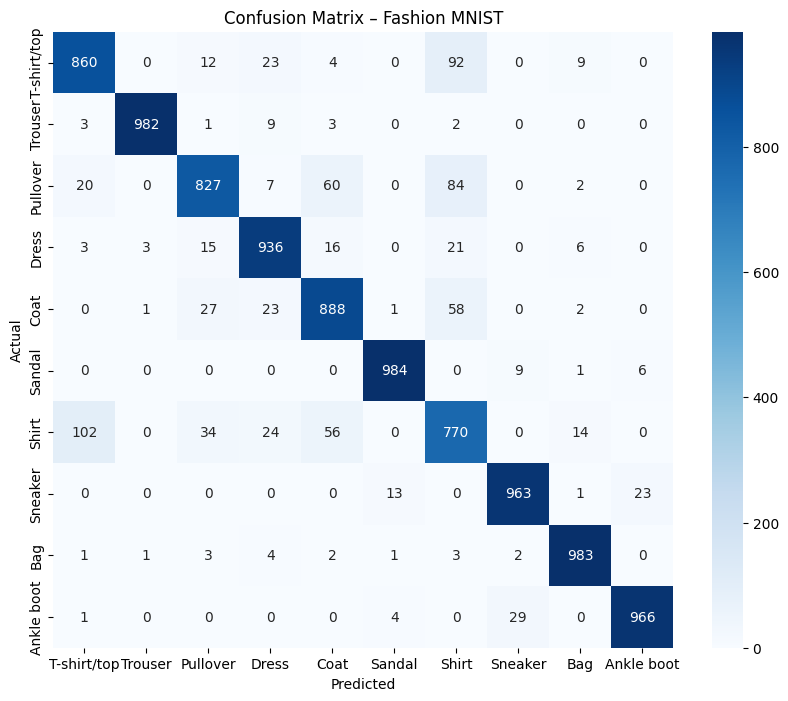

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Fashion MNIST")
plt.show()
